
Attaching package: ‘CombMSC’

The following object is masked from ‘package:stats’:

    BIC


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



time series ends   2011-12-30


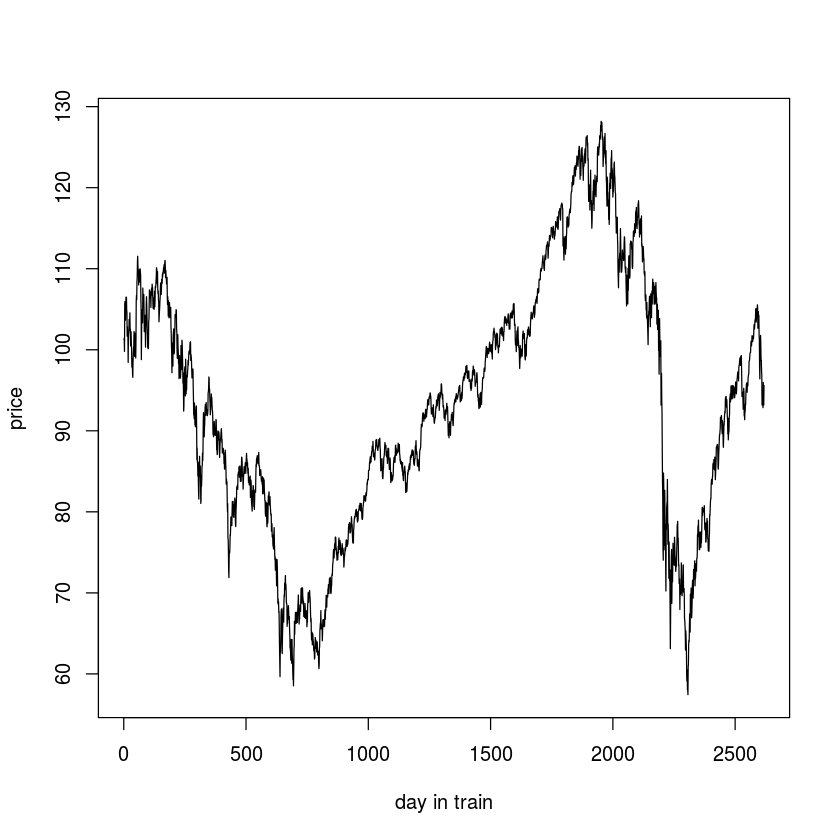

ERROR: Error in NCOL(x): object 'spy_test' not found


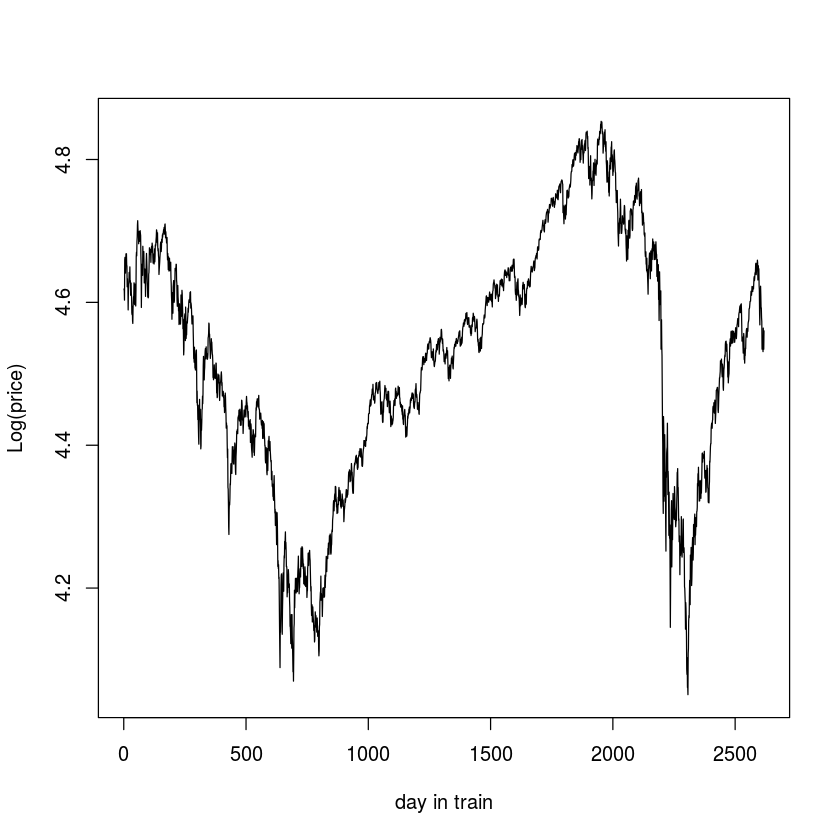

In [1]:
library(CombMSC)
library(tseries)
library(zoo)


spy = get.hist.quote(instrument = "SPY", "2000-01-04", "2011-12-31",quote = c("AdjClose"),
provider = c("yahoo"), method = NULL, compression = "d",
retclass = c("zoo"), quiet = FALSE, drop = FALSE)

#spy$train_test = get.hist.quote(instrument = "spy$train", "2011-01-01", "2011-12-31",quote = c("AdjClose"),
#provider = c("yahoo"), method = NULL, compression = "d",
#retclass = c("zoo"), quiet = FALSE, drop = FALSE)


#spy$train =ts(spy$train, frequency=7)

test_len = 400

spy = ts(coredata(spy), frequency = 1)
spy = splitTrainTest(spy, numTrain = length(spy) - test_len)
#spy$train
#spy$test

plot(spy$train,ylab='price', xlab='day in train')
plot(log(spy$train), ylab="Log(price)", xlab="day in train")

plot.ts(spy$test,ylab='price', xlab='day in test')
plot.ts(log(spy$test), ylab="Log(price)", xlab="day in test")